In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import sys
sys.path.append(r'/home/brandon/Documents/Code/low-mag-immune')
from low_mag_immune import compute_all_line_dists, compute_all_median_intens
from diptericin_paper_utils import dpt


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
#%matplotlib qt
%matplotlib inline

In [3]:
"""plot style"""
linewidth = 4
mpl.rc('axes', linewidth=linewidth)
mpl.rc('font', family='Arial')
fontsize = 24


colors = {'no_inj': [0.8, 0.8, 0.8],
         'mock': [0.4, 0.4, 0.4],
         'e.coli': [0, 0.4, 0],
         'complete': [0, 0.8, 0]}

def style_axes(ax, fontsize=24):
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    plt.tight_layout()
    
    return ax


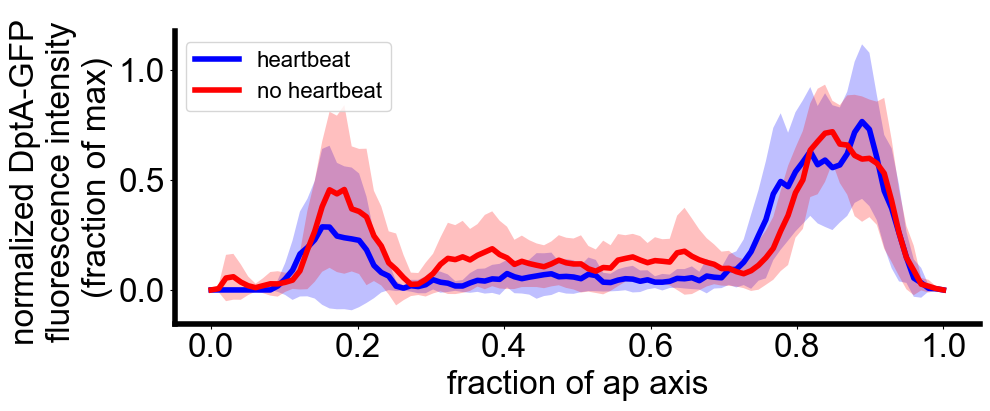

In [6]:
yes_heartbeat_paths = [r'/media/brandon/Data1/Tiffany/AxioZoom/Experimental Data/2023_10_8_Np1029-Gal4]+_+_Dpt-GFP]+xUAS-Ork1](Tm6,sb)_ecoli_mag23.5_exp10ms_100_light/With heartbeat (24hr afterinj)/yes_heartbeat_yes_signal_partial']
no_heatbeat_paths = [r'/media/brandon/Data1/Jazmin/AxioZoom/2023_10_05_dpt-gfp_ork1_pilot/no_heart_beat_with_signal', r'/media/brandon/Data1/Tiffany/AxioZoom/Experimental Data/2023_10_8_Np1029-Gal4]+_+_Dpt-GFP]+xUAS-Ork1](Tm6,sb)_ecoli_mag23.5_exp10ms_100_light/Without heartbeat (24hr afterinj)/with_signal']

signal_thresh=None
larvae_thresh = 250

line_dists_yes = compute_all_line_dists(yes_heartbeat_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh)
line_dists_no = compute_all_line_dists(no_heatbeat_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh)


# plot mean and std of all on one plot
plt.figure(figsize=(10, 4))
all_dists = [line_dists_yes, line_dists_no]
colors = ['b', 'r']
labels = ['heartbeat', 'no heartbeat']
for i, ld in enumerate(all_dists):
    line_dist = ld.copy()
    bin_width = 1 / len(line_dist)
    for j in range(line_dist.shape[0]):
        #line_dist[j] = line_dist[j] / np.max(line_dist[j])
        line_dist[j] = line_dist[j] / np.max(line_dist[j])

    m = np.mean(line_dist, axis=0)
    s = np.std(line_dist, axis=0)
    l = m - s
    u = m + s
    plt.plot(np.linspace(0, 1, len(m)), m, '-', color=colors[i], linewidth=4, label=labels[i])
    plt.fill_between(np.linspace(0, 1, len(m)), l, u, facecolor=colors[i], alpha=0.25)


plt.xlabel('fraction of ap axis', fontsize=fontsize)
plt.ylabel(f'normalized {dpt}-GFP \nfluorescence intensity \n(fraction of max)', fontsize=fontsize)
plt.legend(fontsize=16, loc=2)
ax = style_axes(plt.gca())


In [9]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Supplemental_Figures/ork1/ork1_ap_dists_v2.pdf')